In [17]:
import quic_graph_lasso
import numpy as np

### Preliminary tests

In [15]:
X = np.random.randint(0,100, size=(5,5))
cov = np.cov(X)

In [19]:
np.max(np.abs(X)), X

(98,
 array([[70, 66, 74, 79, 84],
        [71, 56, 52,  4, 91],
        [45, 21, 70, 59, 63],
        [52, 66, 81, 47, 96],
        [75, 98, 56, 59, 77]]))

In [7]:
graph_lasso_model = quic_graph_lasso.QuicGraphicalLasso(init_method='precomputed')

In [10]:
b = graph_lasso_model.fit(cov, init_method='precomputed')

In [12]:
cov

array([[1725.7 , -281.9 , -671.95, -349.65, -176.85],
       [-281.9 ,  358.8 ,  160.9 ,  261.8 , -156.3 ],
       [-671.95,  160.9 , 1006.7 ,  397.65, -884.4 ],
       [-349.65,  261.8 ,  397.65,  735.3 , -121.3 ],
       [-176.85, -156.3 , -884.4 , -121.3 , 1419.8 ]])

In [11]:
b.__dict__

{'lam': 0.5,
 'mode': 'default',
 'tol': 1e-06,
 'max_iter': 1000,
 'Theta0': None,
 'Sigma0': None,
 'method': 'quic',
 'verbose': 0,
 'path': None,
 'score_metric': 'log_likelihood',
 'init_method': 'precomputed',
 'auto_scale': True,
 'opt_': 39.108811017020386,
 'cputime_': 9.6e-05,
 'iters_': 20,
 'duality_gap_': -6.938893903907228e-17,
 'sample_covariance_': array([[1725.7 , -281.9 , -671.95, -349.65, -176.85],
        [-281.9 ,  358.8 ,  160.9 ,  261.8 , -156.3 ],
        [-671.95,  160.9 , 1006.7 ,  397.65, -884.4 ],
        [-349.65,  261.8 ,  397.65,  735.3 , -121.3 ],
        [-176.85, -156.3 , -884.4 , -121.3 , 1419.8 ]]),
 'lam_scale_': 1725.7,
 'is_fitted_': True,
 'path_': None,
 'n_samples_': 5,
 'n_features_': 5,
 'precision_': array([[5.79474996e-04, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
         0.00000000e+00],
        [0.00000000e+00, 2.78706800e-03, 0.00000000e+00, 0.00000000e+00,
         0.00000000e+00],
        [0.00000000e+00, 0.00000000e+00, 9.93667

In [37]:
np.cov(X)

array([[ 696.3 , -479.95, -618.2 ,   72.35,  184.95],
       [-479.95,  875.3 ,  295.55,  301.6 ,  714.2 ],
       [-618.2 ,  295.55,  800.3 , -127.9 , -221.55],
       [  72.35,  301.6 , -127.9 ,  570.7 ,  415.4 ],
       [ 184.95,  714.2 , -221.55,  415.4 , 1522.3 ]])

In [36]:
b.sample_covariance_

array([[ 696.3 , -479.95, -618.2 ,   72.35,  184.95],
       [-479.95,  875.3 ,  295.55,  301.6 ,  714.2 ],
       [-618.2 ,  295.55,  800.3 , -127.9 , -221.55],
       [  72.35,  301.6 , -127.9 ,  570.7 ,  415.4 ],
       [ 184.95,  714.2 , -221.55,  415.4 , 1522.3 ]])

In [27]:
help(np.corrcoef)

Help on function corrcoef in module numpy:

corrcoef(x, y=None, rowvar=True, bias=<no value>, ddof=<no value>, *, dtype=None)
    Return Pearson product-moment correlation coefficients.
    
    Please refer to the documentation for `cov` for more detail.  The
    relationship between the correlation coefficient matrix, `R`, and the
    covariance matrix, `C`, is
    
    .. math:: R_{ij} = \frac{ C_{ij} } { \sqrt{ C_{ii} C_{jj} } }
    
    The values of `R` are between -1 and 1, inclusive.
    
    Parameters
    ----------
    x : array_like
        A 1-D or 2-D array containing multiple variables and observations.
        Each row of `x` represents a variable, and each column a single
        observation of all those variables. Also see `rowvar` below.
    y : array_like, optional
        An additional set of variables and observations. `y` has the same
        shape as `x`.
    rowvar : bool, optional
        If `rowvar` is True (default), then each row represents a
        variab

In [24]:
help(graph_lasso_model)

Help on QuicGraphicalLasso in module quic_graph_lasso object:

class QuicGraphicalLasso(inverse_covariance.InverseCovarianceEstimator)
 |  QuicGraphicalLasso(lam=0.5, mode='default', tol=1e-06, max_iter=1000, Theta0=None, Sigma0=None, path=None, method='quic', verbose=0, score_metric='log_likelihood', init_method='corrcoef', auto_scale=True)
 |  
 |  Computes a sparse inverse covariance matrix estimation using quadratic
 |  approximation.
 |  
 |  The inverse covariance is estimated the sample covariance estimate
 |  $S$ as an input such that:
 |  
 |  $T_hat = max_{\Theta} logdet(Theta) - Trace(ThetaS) - \lambda|\Theta|_1 $
 |  
 |  Parameters
 |  -----------
 |  lam : scalar or 2D ndarray, shape (n_features, n_features) (default=0.5)
 |      Regularization parameters per element of the inverse covariance matrix.
 |  
 |      If a scalar lambda is used, a penalty matrix will be generated
 |      containing lambda for all values in both upper and lower triangles
 |      and zeros along

## Tests on the fake sc_atac data

In [111]:
import pandas as pd
import numpy as np
import anndata as ad
import scipy as sp
import matplotlib.pyplot as plt
import tqdm
from functools import reduce


def add_region_infos(AnnData,
                     sep=('_', '_'),
                     inplace=True):
    """
    Get region informations from the var_names of AnnData object.
    e.g. chr1_12345_12346 -> 'chromosome' : chr1, 'start' : 12345, 'end' : 12346
    These info will be added to var of AnnData object.
        adata.var['chromosome'] : chromosome
        adata.var['start'] : start position
        adata.var['end'] : end position

    Parameters
    ----------
    AnnData : AnnData object
        AnnData object with var_names as region names.
    sep : tuple, optional
        Separator of region names. The default is ('_', '_').
    
    Returns
    -------
    AnnData : AnnData object
        AnnData object with region informations in var.
    """
    # Check if user wants to modify AnnData inplace or return a copy
    if inplace:
        pass
    else:
        AnnData = AnnData.copy()
    regions_list = AnnData.var_names

    # Replace sep[1] with sep[0] to make it easier to split
    regions_list = regions_list.str.replace(sep[1], sep[0])

    # Split region names
    regions_list = regions_list.str.split(sep[0]).tolist()

    # Check if all regions have the same number of elements
    if set([len(i) for i in regions_list]) != set([3]):
        raise ValueError("""Not all regions have the same number of elements.
                         Check if sep is correct, it should be ({}, {}),
                         with only one occurence each in region names.""".format(sep[0], sep[1]))

    # Extract region informations from var_names
    region_infos = pd.DataFrame(regions_list,
                                index=AnnData.var_names,
                                columns=['chromosome', 'start', 'end'])

    # Convert start and end to int
    region_infos['start'] = region_infos['start'].astype(int)
    region_infos['end'] = region_infos['end'].astype(int)

    # Add region informations to var
    AnnData.var['chromosome'] = region_infos['chromosome']
    AnnData.var['start'] = region_infos['start']
    AnnData.var['end'] = region_infos['end']

    sort_regions(AnnData)
    # Return AnnData if inplace is False
    if inplace:
        pass
    else:
        return AnnData


def sort_regions(AnnData):
    """
    Sort regions by chromosome and start position.
    """
    AnnData.var.sort_values(['chromosome', 'start'], inplace=True)
    return AnnData


def get_distance_regions(AnnData, chromosomes=None):
    """
    Get distance between regions.
    """
    # Check if chromosomes is None
    if chromosomes is None:
        # Get chromosome list
        chromosomes = AnnData.var['chromosome'].unique().tolist()
    else:
        if not np.array([i in AnnData.var['chromosome'].unique() for i in chromosomes]).all():
            raise ValueError("""Chromosomes should be in AnnData.var['chromosome'].
                                Check if chromosomes is correct.""")

    # A dictionary to store distance between regions for each chromosome
    distances = {}

    # Get distance between regions for each chromosome
    for chromosome in chromosomes:
        chr_mask = AnnData.var['chromosome']==chromosome
        # Store start and end positions in two arrays
        m, n = np.meshgrid(AnnData.var['start'].values[chr_mask],
                           AnnData.var['end'].values[chr_mask])

        # Get distance between start of region m and end of region n
        distance = np.abs(m-n)

        # Remove diagonal (distance between a region and itself)
        distance = distance - np.diag(distance)*np.eye(distance.shape[0])

        # Keep upper triangle of the distance matrix
        # (we don't want to calculate the same connection twice)
        distance = np.triu(distance, k=1)

        # Test if distance is negative
        if np.any(distance < 0):
            raise ValueError("""Distance between regions should be positive.
                            You might have overlapping regions.""")

        # Store distance in a dictionary
        distances[chromosome] = distance

    # Return distance
    return distances


def potential_connections(AnnData, threshold, chromosomes=None):
    """
    Get potential connections between regions based on distance.
    """
    # Check if chromosomes is None
    if chromosomes is None:
        # Get chromosome list
        chromosomes = AnnData.var['chromosome'].unique().tolist()
    else:
        if not np.array([i in AnnData.var['chromosome'].unique() for i in chromosomes]).all():
            raise ValueError("""Chromosomes should be in AnnData.var['chromosome'].
                                Check if chromosomes is correct.""")
    # Get distance between regions
    distances = get_distance_regions(AnnData, chromosomes=chromosomes)

    potential_connections = {}
    # Get potential connections
    for chromosome in chromosomes:
        print("Getting potential connections for chromosome {}...".format(chromosome))
        # Get potential connections for each chromosome
        distance = distances[chromosome]
        potential_chr_co = np.where((distance <= threshold)
                                         & (distance > 0))

        # Store potential connections in a dictionary
        potential_connections[chromosome] = potential_chr_co

    # Return potential connections
    return potential_connections


def corrcoef_connections(AnnData, potential_connections, as_sparse=True):
    """
    Get correlation coefficient between regions.
    """
    # Transform potential_connections into a sparse matrix
    potential_connections = global_sparse(AnnData, potential_connections)

    # Get correlation coefficient between regions
    corr_coefs = [np.corrcoef(AnnData.X[:, potential_connections.row[i]],
                              AnnData.X[:, potential_connections.col[i]])[0, 1]
                  for i in tqdm.tqdm(range(len(potential_connections.row)))]

    # Convert to sparse matrix if as_sparse is True
    if as_sparse:
        corr_coefs = sp.sparse.coo_matrix((corr_coefs,
                                           (potential_connections.row,
                                            potential_connections.col)),
                                          shape=(AnnData.shape[1],
                                                 AnnData.shape[1]))
    else:
        corr_coefs = np.array(corr_coefs)
    
    # Return correlation coefficients
    return corr_coefs




    # A dictionary storing the informations to create a sparse matrix of potential connections
    corr_coefs = {}
    corr_coefs['values'] = np.array([])
    corr_coefs['idx'] = np.array([])
    corr_coefs['idy'] = np.array([])

    # Get correlation coefficient between regions for each chromosome
    for chromosome in potential_connections.keys():
        chr_mask = AnnData.var['chromosome']==chromosome
        print("Getting correlation coefficient for chromosome {}...".format(chromosome))

        corr_coefs_chr = [np.corrcoef(AnnData.X[:,chr_mask][:, potential_connections[chromosome][0][i]],
                                      AnnData.X[:,chr_mask][:, potential_connections[chromosome][1][i]])[0, 1]
                          for i in range(len(potential_connections[chromosome][0]))]

        # Store correlation coefficient in a dictionary
        corr_coefs[chromosome] = corr_coefs_chr
    return corr_coefs


def global_sparse(AnnData, chr_idx, values = 1):
    """
    Create a sparse matrix from a dictionary of np.where output on 'regions*regions' matrices.of different chromosomes.
    using global indices of an AnnData object.

    e.g.:
    AnnData.var_names = ['chr1_12345_12346', 'chr1_12347_12348', 'chr2_12345_12346', 'chr2_12347_12348']
    And we know values for  (chr1_12345_12346, chr1_12347_12348),
                            (chr1_12347_12348, chr1_12345_12346),
                            (chr2_12345_12346, chr2_12345_12346),
                            (chr2_12347_12348, chr2_12347_12348).
    
    We can create a sparse matrix with 'chr_dic' defined as:
    chr_dic = {'chr1' : np.array([[1, 0], [0, 1]]),
               'chr2' : np.array([[0, 0], [1, 1]])}

    sparse_mtx = global_sparse(AnnData, chr_dic)
    sparse_mtx
    'OUTPUT' :               chr_1_12345_12346  chr_1_12347_12348  chr_2_12345_12346  chr_2_12347_12348
    chr_1_12345_12346                 *                  1                  *                  *
    chr_1_12347_12348                 1                  *                  *                  *
    chr_2_12345_12346                 *                  *                  1                  *
    chr_2_12347_12348                 *                  *                  *                  1

    Parameters
    ----------
    AnnData : AnnData object
        AnnData object with var_names as region names.
    chr_dic : dictionary
        Dictionary of matrices (regions*regions) of different chromosomes.
    """

    data = {}
    data['values'] = np.array([])
    data['idx'] = np.array([])
    data['idy'] = np.array([])

    for chromosome in chr_idx.keys():
        chr_mask = AnnData.var['chromosome'] == chromosome
        # Get region names (needed to get global indices)
        indices_names = AnnData.var_names[chr_mask][chr_idx[chromosome][0]]
        columns_names = AnnData.var_names[chr_mask][chr_idx[chromosome][1]]
        map_indices = {AnnData.var_names[i]: i
                       for i in range(len(AnnData.var_names))}

        # Add global indices of potential connections
        data['idx'] = np.concatenate([data['idx'],
                                      indices_names.map(map_indices).values])
        data['idy'] = np.concatenate([data['idy'],
                                      columns_names.map(map_indices).values])
        # Add values of potential connections
        if type(values) == int:
            val = np.repeat(values, len(chr_idx[chromosome][0]))
        elif type(values) == dict:
            val = values[chromosome]
        else:
            raise ValueError("""values should be an int,
                             or a dict (of numpy arrays).""")
        data['values'] = np.concatenate([data['values'],
                                         val])
    # Create sparse matrix
    sparse_data = sp.sparse.coo_matrix((data['values'],
                                        (data['idx'],
                                         data['idy'])),
                                       shape=(AnnData.shape[1],
                                              AnnData.shape[1]))

    return sparse_data


def sliding_graphical_lasso(AnnData,
                            scores,
                            penalties,
                            window_size,
                            ):
    """
    Extract sliding submatrix from a sparse correlation matrix.

    WARNING: might look generalised for many overlaps but is not yet at the end, that's why 'start_sliding' is hard coded as list of 2 values.
    """
    start_slidings = [0, int(window_size/2)]

    results = {}
    results['scores'] = np.array([])
    results['idx'] = np.array([])
    results['idy'] = np.array([])

    regions_list = AnnData.var_names
    # Get global indices of regions
    map_indices = {regions_list[i]: i for i in range(len(regions_list))}

    for k in start_slidings:
        for chromosome in AnnData.var['chromosome'].unique():
            print(chromosome)
            # Get start positions of windows
            window_starts = [i for i in range(k,
                                              AnnData.var['end']
                                              [AnnData.var['chromosome']
                                                  == chromosome].max(),
                                              window_size)]

            for start in tqdm.tqdm(window_starts):
                end = start + window_size
                # Get global indices of regions in the window
                idx = np.where((AnnData.var['chromosome'] == chromosome)
                            & (AnnData.var['start'] >= start)
                            & (AnnData.var['start'] <= end))[0]

                # already global ?
                ## Get global indices of regions in the window
                #idx = [map_indices[i] for i in regions_list[idx]]

                # Get submatrix
                window_scores = sp.sparse.csr_matrix(scores)[idx, :][:, idx]
                window_scores = sp.sparse.coo_matrix(window_scores).toarray()\
                + sp.sparse.coo_matrix(window_scores).T.toarray()

                window_penalties = sp.sparse.csr_matrix(penalties)[idx, :][:, idx]
                window_penalties = sp.sparse.coo_matrix(window_penalties).toarray()\
                + sp.sparse.coo_matrix(window_scores).T.toarray()

                # Initiating graphical lasso
                graph_lasso_model = quic_graph_lasso.QuicGraphicalLasso(init_method='precomputed', lam=window_penalties)

                # Fit graphical lasso
                graph_lasso_model.fit(window_scores)

                # Names of regions in the window
                window_region_names = AnnData.var_names[idx].copy()

                # convert to sparse matrix the results
                corrected_scores = sp.sparse.coo_matrix(graph_lasso_model.covariance_)

                # Convert corrected_scores column and row indices to global indices
                idx = [map_indices[name]
                    for name in window_region_names[corrected_scores.row]]
                idy = [map_indices[name]
                    for name in window_region_names[corrected_scores.col]]

                # Add the "sub" resuls to the global sparse matrix
                results['scores'] = np.concatenate([results['scores'],
                                                            corrected_scores.data])
                results['idx'] = np.concatenate([results['idx'],
                                                idx])
                results['idy'] = np.concatenate([results['idy'],
                                                idy])
            print(window_penalties)

            # Create sparse matrix
            results['window_' + str(k)] = sp.sparse.coo_matrix((results['scores'],
                                            (results['idx'],
                                            results['idy'])),
                                            shape=(AnnData.X.shape[1],
                                                   AnnData.X.shape[1]))

    sliding_keys = ['window_' + str(k) for k in start_slidings]

    k_positive_coords = []
    k_negative_coords = []
    for k in sliding_keys:
        print(k)
        k_positive_coords.append({(x, y) for x, y, d in zip(results[k].row,
                                                          results[k].col,
                                                          results[k].data)
                                if d >= 0})
        k_negative_coords.append({(x, y) for x, y, d in zip(results[k].row,
                                                          results[k].col,
                                                          results[k].data)
                                if d <= 0})
    

    # Get shared positive and negative coordinates intersection
    positive_coords = set.intersection(*k_positive_coords)
    negative_coords = set.intersection(*k_negative_coords)
    del k_positive_coords
    del k_negative_coords
    # Shared and same sign coordinates
    coords = pd.DataFrame(set.union(negative_coords, positive_coords),
                          columns=['row', 'col'])

    # Add common signe values
    average = [sp.sparse.csr_matrix(
        (
            sp.sparse.csr_matrix(results[k])[coords['row'], coords['col']].tolist()[0],
            (coords['row'], coords['col'])),
        shape = results_k.shape) for k in sliding_keys[:]]

    average = reduce(lambda x,y:x+y,[average])
    
    # Divide for mean value
    average = average/len(sliding_keys)

    # Add uni-measurement values
    ## Get all shared coordinates
    all_coords = set.intersection({(x, y) for x, y, d in zip(results[k].row,
                                                          results[k].col,
                                                          results[k].data)})
    for k in sliding_keys:
        # get all coordinates in a set
        k_coords = {(x, y) for x, y, d in zip(results[k].row,
                                              results[k].col,
                                              results[k].data)}
        # Substract all shared coordinates to this set
        k_coords = pd.DataFrame(k_coords.difference(all_coords),
                               columns = ['row', 'col'])
        # Add values to the results
        k_single = sp.sparse.csr_matrix(
        (
            sp.sparse.csr_matrix(results[k])[k_coords['row'], k_coords['col']].tolist()[0],
            (k_coords['row'], k_coords['col'])),
        shape = results[k].shape)
            
        average += k_single

     # FIX/BUG/ADD Add a way of handling value with non maximal number of overlap
     # if more than 1 overlap with the windows
    
    return sp.sparse.coo_matrix(average)


In [99]:
import numpy as np
import pandas as pd
import anndata as ad
import scipy as sp

import quic_graph_lasso

In [100]:
bb =  sp.sparse.csr_matrix(sample_cov)[[1,5,6],[5,7, 8]]

In [101]:
bb.tolist()[0]

[0.07569250359115495, -0.024942585778887583, -0.03908309690505601]

In [102]:
sp.sparse.csr_matrix(
    (sp.sparse.csr_matrix(sample_cov)[[1,5,6],[5,7, 8]].tolist()[0],
     ([1,5,6],[5,7,8])),
    shape=[50,50])

<50x50 sparse matrix of type '<class 'numpy.float64'>'
	with 3 stored elements in Compressed Sparse Row format>

## Create dataset

In [113]:
# Create fake single-cell atac-seq data
nb_cells = 300
nb_chr = 10
nb_regions_per_chr = 200
between_reg = 1000
size_reg = 50

counts = []
for chr in range(nb_chr):
    counts.append(pd.DataFrame(np.random.randint(0,100, size=(nb_cells, nb_regions_per_chr)),
                        index=['Cell_'+j for j in map(str, range(nb_cells))],
                        columns=['chr'+str(chr)+'_'+str(i)+'_'+str(i+size_reg) for i in range(1, nb_regions_per_chr*between_reg+1, between_reg)]))
atac = ad.AnnData(pd.concat(counts, axis=1))

In [114]:
distance_threshold = 50000

### 1/5 Add region position in AnnData.obs

In [115]:
add_region_infos(atac)

### 2/5 Get potential pairs of connected regions (per chromosome)

In [116]:
potential_connections_atac = potential_connections(atac, threshold=distance_threshold)

Getting potential connections for chromosome chr0...
Getting potential connections for chromosome chr1...
Getting potential connections for chromosome chr2...
Getting potential connections for chromosome chr3...
Getting potential connections for chromosome chr4...
Getting potential connections for chromosome chr5...
Getting potential connections for chromosome chr6...
Getting potential connections for chromosome chr7...
Getting potential connections for chromosome chr8...
Getting potential connections for chromosome chr9...


### 3/5 Calculate correlations (cov in fact)

In [117]:
sample_cov = corrcoef_connections(atac, potential_connections_atac, as_sparse=True)

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 87250/87250 [00:03<00:00, 22724.65it/s]


### 4/5 Calculate penalty associated with distance for each pair of regions

_Calculate the euclidean distance between all pair of region (per chromosome)_

In [118]:
global_distance = global_sparse(atac, potential_connections_atac)
for i in tqdm.tqdm(range(len(global_distance.row))):
    global_distance.data[i] = atac.var.iloc[global_distance.col[i],:]['start']- atac.var.iloc[global_distance.row[i],:]['end'] 

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 87250/87250 [00:11<00:00, 7585.14it/s]


In [119]:
alpha = 200000
global_distance.data = alpha * (1 - (global_distance.data/800)**-0.75)

In [120]:
final_score = sliding_graphical_lasso(atac,
                        scores=sample_cov,
                        penalties=global_distance,
                        window_size=4000)

chr0


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [00:00<00:00, 118.54it/s]


[[ 0.00000000e+00  2.41855037e+04  9.74770025e+04  1.24840968e+05]
 [ 4.09856257e-02  0.00000000e+00  2.41854265e+04  9.74770515e+04]
 [ 5.47702087e-02 -3.61996694e-02  0.00000000e+00  2.41854269e+04]
 [-3.49201022e-02  1.03756180e-01 -3.58251133e-02  0.00000000e+00]]
chr1


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [00:00<00:00, 122.76it/s]


[[ 0.00000000e+00  2.41855497e+04  9.74770120e+04  1.24841032e+05]
 [ 8.69635111e-02  0.00000000e+00  2.41855197e+04  9.74768848e+04]
 [ 6.43016155e-02  5.69335937e-02  0.00000000e+00  2.41855114e+04]
 [ 2.86522219e-02 -6.28709894e-02  4.86739848e-02  0.00000000e+00]]
chr2


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [00:00<00:00, 122.33it/s]


[[ 0.00000000e+00  2.41853583e+04  9.74769130e+04  1.24841023e+05]
 [-1.04448668e-01  0.00000000e+00  2.41854992e+04  9.74770763e+04]
 [-3.47321120e-02  3.64916741e-02  0.00000000e+00  2.41854129e+04]
 [ 1.99812533e-02  1.28565503e-01 -4.98794663e-02  0.00000000e+00]]
chr3


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [00:00<00:00, 110.84it/s]


[[ 0.00000000e+00  2.41856217e+04  9.74769827e+04  1.24840926e+05]
 [ 1.58972272e-01  0.00000000e+00  2.41853281e+04  9.74769679e+04]
 [ 3.49510132e-02 -1.34607015e-01  0.00000000e+00  2.41854044e+04]
 [-7.72019257e-02  2.01689882e-02 -5.83482900e-02  0.00000000e+00]]
chr4


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [00:00<00:00, 103.47it/s]


[[ 0.00000000e+00  2.41854526e+04  9.74769099e+04  1.24841035e+05]
 [-1.01924897e-02  0.00000000e+00  2.41854955e+04  9.74769479e+04]
 [-3.78476074e-02  3.27145860e-02  0.00000000e+00  2.41854508e+04]
 [ 3.19560462e-02  1.68114642e-04 -1.19491812e-02  0.00000000e+00]]
chr5


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [00:00<00:00, 116.21it/s]


[[ 0.00000000e+00  2.41854026e+04  9.74769848e+04  1.24840978e+05]
 [-6.01336401e-02  0.00000000e+00  2.41854572e+04  9.74769822e+04]
 [ 3.70353175e-02 -5.59142519e-03  0.00000000e+00  2.41854158e+04]
 [-2.48716175e-02  3.45042243e-02 -4.69515519e-02  0.00000000e+00]]
chr6


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [00:00<00:00, 107.57it/s]


[[ 0.00000000e+00  2.41855812e+04  9.74769077e+04  1.24841124e+05]
 [ 1.18483191e-01  0.00000000e+00  2.41853992e+04  9.74770220e+04]
 [-4.00314460e-02 -6.35360410e-02  0.00000000e+00  2.41855652e+04]
 [ 1.20238610e-01  7.43344464e-02  1.02490854e-01  0.00000000e+00]]
chr7


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [00:00<00:00, 131.26it/s]


[[ 0.00000000e+00  2.41854510e+04  9.74769653e+04  1.24840980e+05]
 [-1.17040883e-02  0.00000000e+00  2.41854925e+04  9.74769542e+04]
 [ 1.76312092e-02  2.97117721e-02  0.00000000e+00  2.41855523e+04]
 [-2.33308552e-02  6.52391269e-03  8.95973821e-02  0.00000000e+00]]
chr8


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [00:00<00:00, 118.85it/s]


[[ 0.00000000e+00  2.41854027e+04  9.74770562e+04  1.24840862e+05]
 [-6.00773486e-02  0.00000000e+00  2.41854610e+04  9.74768735e+04]
 [ 1.08454492e-01 -1.74186555e-03  0.00000000e+00  2.41854336e+04]
 [-1.41570387e-01 -7.42072037e-02 -2.91091457e-02  0.00000000e+00]]
chr9


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [00:00<00:00, 124.85it/s]


[[ 0.00000000e+00  2.41855680e+04  9.74769327e+04  1.24840944e+05]
 [ 1.05219195e-01  0.00000000e+00  2.41854292e+04  9.74770015e+04]
 [-1.50538365e-02 -3.35388919e-02  0.00000000e+00  2.41855038e+04]
 [-5.88626511e-02  5.38170223e-02  4.10901211e-02  0.00000000e+00]]
chr0


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [00:00<00:00, 105.05it/s]


[[ 0.00000000e+00  2.41854269e+04]
 [-3.58251133e-02  0.00000000e+00]]
chr1


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [00:00<00:00, 121.38it/s]


[[0.00000000e+00 2.41855114e+04]
 [4.86739848e-02 0.00000000e+00]]
chr2


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [00:00<00:00, 114.45it/s]


[[ 0.00000000e+00  2.41854129e+04]
 [-4.98794663e-02  0.00000000e+00]]
chr3


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [00:00<00:00, 121.07it/s]


[[ 0.00000000e+00  2.41854044e+04]
 [-5.83482900e-02  0.00000000e+00]]
chr4


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [00:00<00:00, 131.92it/s]


[[ 0.00000000e+00  2.41854508e+04]
 [-1.19491812e-02  0.00000000e+00]]
chr5


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [00:00<00:00, 129.84it/s]


[[ 0.00000000e+00  2.41854158e+04]
 [-4.69515519e-02  0.00000000e+00]]
chr6


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [00:00<00:00, 131.47it/s]


[[0.00000000e+00 2.41855652e+04]
 [1.02490854e-01 0.00000000e+00]]
chr7


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [00:00<00:00, 116.72it/s]


[[0.00000000e+00 2.41855523e+04]
 [8.95973821e-02 0.00000000e+00]]
chr8


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [00:00<00:00, 126.14it/s]


[[ 0.00000000e+00  2.41854336e+04]
 [-2.91091457e-02  0.00000000e+00]]
chr9


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [00:00<00:00, 129.39it/s]


[[0.00000000e+00 2.41855038e+04]
 [4.10901211e-02 0.00000000e+00]]
window_0
window_2000


NameError: name 'results_k' is not defined

### Test with sparse covariance true matrix as GT

NameError: name 'cov' is not defined

In [10]:
from scipy import linalg

from sklearn.datasets import make_sparse_spd_matrix

In [11]:
# Create fake single-cell atac-seq data
nb_cells = 300
nb_chr = 10
nb_regions_per_chr = 200
between_reg = 1000
size_reg = 50

counts = []
for chr in range(nb_chr):
    counts.append(pd.DataFrame(np.random.randint(0,100, size=(nb_cells, nb_regions_per_chr)),
                        index=['Cell_'+j for j in map(str, range(nb_cells))],
                        columns=['chr'+str(chr)+'_'+str(i)+'_'+str(i+size_reg) for i in range(1, nb_regions_per_chr*between_reg+1, between_reg)]))
X_atac = ad.AnnData(pd.concat(counts, axis=1))

NameError: name 'np' is not defined

### 1/5 Add region position in AnnData.obs

In [ ]:
add_region_infos(X_atac)

### 2/5 Get potential pairs of connected regions (per chromosome)

In [170]:
potential_connections_X_atac = potential_connections(X_atac, threshold=distance_threshold)

Getting potential connections for chromosome chr0...
Getting potential connections for chromosome chr1...
Getting potential connections for chromosome chr2...
Getting potential connections for chromosome chr3...
Getting potential connections for chromosome chr4...
Getting potential connections for chromosome chr5...
Getting potential connections for chromosome chr6...
Getting potential connections for chromosome chr7...
Getting potential connections for chromosome chr8...
Getting potential connections for chromosome chr9...


### Replace data with fake cov matrix

In [191]:
n_samples, n_features = 300, 200

prng = np.random.RandomState(1)
prec = make_sparse_spd_matrix(
    n_features, alpha=0.98, smallest_coef=0.4, largest_coef=0.7, random_state=prng
)
cov = linalg.inv(prec)

print(cov)
#cov with only potential connections
possible_co = sp.sparse.csr_matrix(global_sparse(X_atac, potential_connections_X_atac))[:cov.shape[0],:cov.shape[1]]
possible_co = sp.sparse.coo_matrix(possible_co).toarray() + sp.sparse.coo_matrix(possible_co).toarray().T 
cov = np.eye(len(cov))*np.diag(cov) + possible_co*cov 
d = np.sqrt(np.diag(cov))
cov /= d
cov /= d[:, np.newaxis]
prec *= d
prec *= d[:, np.newaxis]
X = prng.multivariate_normal(np.zeros(n_features), cov, size=n_samples)
X -= X.mean(axis=0)
X /= X.std(axis=0)

[[ 2.49953438e+00  1.59633216e-01  8.17485346e-03 ...  1.40421692e+00
  -6.90858791e-17  8.15946011e-17]
 [ 1.59633216e-01  4.18617817e+00  3.92059845e-02 ...  3.79224311e-01
  -1.27411708e-16  9.89025468e-17]
 [ 8.17485346e-03  3.92059845e-02  1.72443559e+00 ...  4.70277838e-01
   1.90448466e-17  9.39574195e-17]
 ...
 [ 1.40421692e+00  3.79224311e-01  4.70277838e-01 ...  5.14658370e+00
  -1.83353814e-18  7.59005037e-02]
 [-1.11373351e-16 -2.66017117e-16 -9.99377251e-19 ... -6.05697726e-17
   1.00000000e+00 -5.41771603e-17]
 [ 6.93889390e-18  7.74784006e-17  1.00687167e-16 ...  7.59005037e-02
  -4.16689269e-17  1.42533591e+00]]


/tmp/ipykernel_3325/3972514946.py:19: RuntimeWarning: covariance is not symmetric positive-semidefinite.
  X = prng.multivariate_normal(np.zeros(n_features), cov, size=n_samples)


In [194]:
X

array([[-1.06061921, -0.05915464, -0.78613641, ...,  0.96070983,
        -2.15950492,  0.34330568],
       [-0.48774682,  0.11742554,  0.11529935, ..., -0.18865899,
        -0.09147489, -1.948333  ],
       [ 0.1676867 ,  0.36541675, -0.64213916, ...,  2.18179493,
         1.37199129, -0.11055557],
       ...,
       [ 1.65493906, -0.44919119,  0.32926152, ...,  0.05133033,
         1.32606086,  1.1502605 ],
       [-0.5545452 ,  0.07387893, -0.47858948, ..., -0.75877999,
         1.1394893 ,  0.31716484],
       [ 0.05733731,  0.80826854,  1.48532816, ...,  1.42783422,
         1.63355984,  1.57279188]])

In [214]:
X_ = np.concatenate([X]*10, axis=1)

In [215]:
X_atac = atac.copy()
X_atac.X = X_

In [216]:
distance_threshold = 50000

### 3/5 Calculate correlations (cov in fact)

In [217]:
sample_X_cov = corrcoef_connections(X_atac, potential_connections_X_atac, as_sparse=True)

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 87250/87250 [00:03<00:00, 26718.28it/s]


In [218]:
global_distance = global_sparse(X_atac, potential_connections_X_atac)
for i in tqdm.tqdm(range(len(global_distance.row))):
    global_distance.data[i] = X_atac.var.iloc[global_distance.col[i],:]['start']- X_atac.var.iloc[global_distance.row[i],:]['end'] 

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 87250/87250 [00:08<00:00, 9722.11it/s]


In [219]:
alpha = 1
global_distance.data = alpha * (1 - (global_distance.data/800)**-0.75)#/1000)**-0.75)

In [220]:
sp.sparse.csr_matrix(global_distance)[:5,:5].todense()

matrix([[0.        , 0.12092731, 0.48738474, 0.62420502, 0.69809544],
        [0.        , 0.        , 0.12092731, 0.48738474, 0.62420502],
        [0.        , 0.        , 0.        , 0.12092731, 0.48738474],
        [0.        , 0.        , 0.        , 0.        , 0.12092731],
        [0.        , 0.        , 0.        , 0.        , 0.        ]])

In [221]:
final_score = sliding_graphical_lasso(X_atac,
                        scores=sample_X_cov,
                        penalties=global_distance,
                        window_size=50000)

chr0


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:10<00:00,  2.72s/it]


[[ 0.00000000e+00  1.48255386e-01  6.24027582e-01 ...  1.13701883e+00
   9.79470378e-01  8.84982787e-01]
 [ 2.73280727e-02  0.00000000e+00  1.61865168e-01 ...  1.04268951e+00
   9.52794670e-01  9.53187808e-01]
 [ 1.36642844e-01  4.09378540e-02  0.00000000e+00 ...  1.34925440e+00
   9.07341902e-01  9.71370083e-01]
 ...
 [ 1.84180676e-01  9.06190599e-02  3.97981460e-01 ...  0.00000000e+00
   8.76260174e-02  5.71272784e-01]
 [ 2.58926119e-02 -4.34844146e-05 -4.47285477e-02 ... -3.33012963e-02
   0.00000000e+00  1.04073401e-01]
 [-6.93080813e-02 -3.89958479e-04  1.85319289e-02 ...  8.38880454e-02
  -1.68539126e-02  0.00000000e+00]]
chr1


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:10<00:00,  2.73s/it]


[[ 0.00000000e+00  1.48255386e-01  6.24027582e-01 ...  1.13701883e+00
   9.79470378e-01  8.84982787e-01]
 [ 2.73280727e-02  0.00000000e+00  1.61865168e-01 ...  1.04268951e+00
   9.52794670e-01  9.53187808e-01]
 [ 1.36642844e-01  4.09378540e-02  0.00000000e+00 ...  1.34925440e+00
   9.07341902e-01  9.71370083e-01]
 ...
 [ 1.84180676e-01  9.06190599e-02  3.97981460e-01 ...  0.00000000e+00
   8.76260174e-02  5.71272784e-01]
 [ 2.58926119e-02 -4.34844146e-05 -4.47285477e-02 ... -3.33012963e-02
   0.00000000e+00  1.04073401e-01]
 [-6.93080813e-02 -3.89958479e-04  1.85319289e-02 ...  8.38880454e-02
  -1.68539126e-02  0.00000000e+00]]
chr2


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:10<00:00,  2.63s/it]


[[ 0.00000000e+00  1.48255386e-01  6.24027582e-01 ...  1.13701883e+00
   9.79470378e-01  8.84982787e-01]
 [ 2.73280727e-02  0.00000000e+00  1.61865168e-01 ...  1.04268951e+00
   9.52794670e-01  9.53187808e-01]
 [ 1.36642844e-01  4.09378540e-02  0.00000000e+00 ...  1.34925440e+00
   9.07341902e-01  9.71370083e-01]
 ...
 [ 1.84180676e-01  9.06190599e-02  3.97981460e-01 ...  0.00000000e+00
   8.76260174e-02  5.71272784e-01]
 [ 2.58926119e-02 -4.34844146e-05 -4.47285477e-02 ... -3.33012963e-02
   0.00000000e+00  1.04073401e-01]
 [-6.93080813e-02 -3.89958479e-04  1.85319289e-02 ...  8.38880454e-02
  -1.68539126e-02  0.00000000e+00]]
chr3


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:11<00:00,  2.75s/it]


[[ 0.00000000e+00  1.48255386e-01  6.24027582e-01 ...  1.13701883e+00
   9.79470378e-01  8.84982787e-01]
 [ 2.73280727e-02  0.00000000e+00  1.61865168e-01 ...  1.04268951e+00
   9.52794670e-01  9.53187808e-01]
 [ 1.36642844e-01  4.09378540e-02  0.00000000e+00 ...  1.34925440e+00
   9.07341902e-01  9.71370083e-01]
 ...
 [ 1.84180676e-01  9.06190599e-02  3.97981460e-01 ...  0.00000000e+00
   8.76260174e-02  5.71272784e-01]
 [ 2.58926119e-02 -4.34844146e-05 -4.47285477e-02 ... -3.33012963e-02
   0.00000000e+00  1.04073401e-01]
 [-6.93080813e-02 -3.89958479e-04  1.85319289e-02 ...  8.38880454e-02
  -1.68539126e-02  0.00000000e+00]]
chr4


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:10<00:00,  2.68s/it]


[[ 0.00000000e+00  1.48255386e-01  6.24027582e-01 ...  1.13701883e+00
   9.79470378e-01  8.84982787e-01]
 [ 2.73280727e-02  0.00000000e+00  1.61865168e-01 ...  1.04268951e+00
   9.52794670e-01  9.53187808e-01]
 [ 1.36642844e-01  4.09378540e-02  0.00000000e+00 ...  1.34925440e+00
   9.07341902e-01  9.71370083e-01]
 ...
 [ 1.84180676e-01  9.06190599e-02  3.97981460e-01 ...  0.00000000e+00
   8.76260174e-02  5.71272784e-01]
 [ 2.58926119e-02 -4.34844146e-05 -4.47285477e-02 ... -3.33012963e-02
   0.00000000e+00  1.04073401e-01]
 [-6.93080813e-02 -3.89958479e-04  1.85319289e-02 ...  8.38880454e-02
  -1.68539126e-02  0.00000000e+00]]
chr5


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:10<00:00,  2.67s/it]


[[ 0.00000000e+00  1.48255386e-01  6.24027582e-01 ...  1.13701883e+00
   9.79470378e-01  8.84982787e-01]
 [ 2.73280727e-02  0.00000000e+00  1.61865168e-01 ...  1.04268951e+00
   9.52794670e-01  9.53187808e-01]
 [ 1.36642844e-01  4.09378540e-02  0.00000000e+00 ...  1.34925440e+00
   9.07341902e-01  9.71370083e-01]
 ...
 [ 1.84180676e-01  9.06190599e-02  3.97981460e-01 ...  0.00000000e+00
   8.76260174e-02  5.71272784e-01]
 [ 2.58926119e-02 -4.34844146e-05 -4.47285477e-02 ... -3.33012963e-02
   0.00000000e+00  1.04073401e-01]
 [-6.93080813e-02 -3.89958479e-04  1.85319289e-02 ...  8.38880454e-02
  -1.68539126e-02  0.00000000e+00]]
chr6


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:11<00:00,  2.77s/it]


[[ 0.00000000e+00  1.48255386e-01  6.24027582e-01 ...  1.13701883e+00
   9.79470378e-01  8.84982787e-01]
 [ 2.73280727e-02  0.00000000e+00  1.61865168e-01 ...  1.04268951e+00
   9.52794670e-01  9.53187808e-01]
 [ 1.36642844e-01  4.09378540e-02  0.00000000e+00 ...  1.34925440e+00
   9.07341902e-01  9.71370083e-01]
 ...
 [ 1.84180676e-01  9.06190599e-02  3.97981460e-01 ...  0.00000000e+00
   8.76260174e-02  5.71272784e-01]
 [ 2.58926119e-02 -4.34844146e-05 -4.47285477e-02 ... -3.33012963e-02
   0.00000000e+00  1.04073401e-01]
 [-6.93080813e-02 -3.89958479e-04  1.85319289e-02 ...  8.38880454e-02
  -1.68539126e-02  0.00000000e+00]]
chr7


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:12<00:00,  3.06s/it]


[[ 0.00000000e+00  1.48255386e-01  6.24027582e-01 ...  1.13701883e+00
   9.79470378e-01  8.84982787e-01]
 [ 2.73280727e-02  0.00000000e+00  1.61865168e-01 ...  1.04268951e+00
   9.52794670e-01  9.53187808e-01]
 [ 1.36642844e-01  4.09378540e-02  0.00000000e+00 ...  1.34925440e+00
   9.07341902e-01  9.71370083e-01]
 ...
 [ 1.84180676e-01  9.06190599e-02  3.97981460e-01 ...  0.00000000e+00
   8.76260174e-02  5.71272784e-01]
 [ 2.58926119e-02 -4.34844146e-05 -4.47285477e-02 ... -3.33012963e-02
   0.00000000e+00  1.04073401e-01]
 [-6.93080813e-02 -3.89958479e-04  1.85319289e-02 ...  8.38880454e-02
  -1.68539126e-02  0.00000000e+00]]
chr8


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:12<00:00,  3.01s/it]


[[ 0.00000000e+00  1.48255386e-01  6.24027582e-01 ...  1.13701883e+00
   9.79470378e-01  8.84982787e-01]
 [ 2.73280727e-02  0.00000000e+00  1.61865168e-01 ...  1.04268951e+00
   9.52794670e-01  9.53187808e-01]
 [ 1.36642844e-01  4.09378540e-02  0.00000000e+00 ...  1.34925440e+00
   9.07341902e-01  9.71370083e-01]
 ...
 [ 1.84180676e-01  9.06190599e-02  3.97981460e-01 ...  0.00000000e+00
   8.76260174e-02  5.71272784e-01]
 [ 2.58926119e-02 -4.34844146e-05 -4.47285477e-02 ... -3.33012963e-02
   0.00000000e+00  1.04073401e-01]
 [-6.93080813e-02 -3.89958479e-04  1.85319289e-02 ...  8.38880454e-02
  -1.68539126e-02  0.00000000e+00]]
chr9


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:12<00:00,  3.01s/it]


[[ 0.00000000e+00  1.48255386e-01  6.24027582e-01 ...  1.13701883e+00
   9.79470378e-01  8.84982787e-01]
 [ 2.73280727e-02  0.00000000e+00  1.61865168e-01 ...  1.04268951e+00
   9.52794670e-01  9.53187808e-01]
 [ 1.36642844e-01  4.09378540e-02  0.00000000e+00 ...  1.34925440e+00
   9.07341902e-01  9.71370083e-01]
 ...
 [ 1.84180676e-01  9.06190599e-02  3.97981460e-01 ...  0.00000000e+00
   8.76260174e-02  5.71272784e-01]
 [ 2.58926119e-02 -4.34844146e-05 -4.47285477e-02 ... -3.33012963e-02
   0.00000000e+00  1.04073401e-01]
 [-6.93080813e-02 -3.89958479e-04  1.85319289e-02 ...  8.38880454e-02
  -1.68539126e-02  0.00000000e+00]]
chr0


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:09<00:00,  2.38s/it]


[[ 0.00000000e+00  1.73372330e-01  6.97901742e-01  7.59811809e-01
   7.54845331e-01  7.97673044e-01  1.05974300e+00  9.07516550e-01
   8.68098886e-01  1.05955183e+00  8.82678736e-01  9.68194872e-01
   1.02327516e+00  8.76541426e-01  9.13993306e-01  8.08294167e-01
   1.03343570e+00  1.05829146e+00  9.34832916e-01  8.53634601e-01
   9.18140007e-01  1.30400373e+00  1.03202295e+00  9.86128850e-01
   8.02029182e-01]
 [ 5.24450159e-02  0.00000000e+00  1.85401946e-01  9.65131801e-01
   6.09189800e-01  6.79894745e-01  1.14161928e+00  7.78575874e-01
   8.33192252e-01  8.83638042e-01  9.39894716e-01  6.62439563e-01
   9.11523187e-01  9.64496932e-01  8.62597610e-01  8.48225193e-01
   9.25176819e-01  8.49036724e-01  8.90807372e-01  7.84282565e-01
   9.52594231e-01  9.13344680e-01  8.86081667e-01  9.64222868e-01
   1.07567672e+00]
 [ 2.10517003e-01  6.44746320e-02  0.00000000e+00  2.79572340e-01
   5.67545045e-01  5.78754346e-01  8.80925483e-01  8.80601919e-01
   8.86829759e-01  1.17232647e+00  8.2

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:09<00:00,  2.37s/it]


[[ 0.00000000e+00  1.73372330e-01  6.97901742e-01  7.59811809e-01
   7.54845331e-01  7.97673044e-01  1.05974300e+00  9.07516550e-01
   8.68098886e-01  1.05955183e+00  8.82678736e-01  9.68194872e-01
   1.02327516e+00  8.76541426e-01  9.13993306e-01  8.08294167e-01
   1.03343570e+00  1.05829146e+00  9.34832916e-01  8.53634601e-01
   9.18140007e-01  1.30400373e+00  1.03202295e+00  9.86128850e-01
   8.02029182e-01]
 [ 5.24450159e-02  0.00000000e+00  1.85401946e-01  9.65131801e-01
   6.09189800e-01  6.79894745e-01  1.14161928e+00  7.78575874e-01
   8.33192252e-01  8.83638042e-01  9.39894716e-01  6.62439563e-01
   9.11523187e-01  9.64496932e-01  8.62597610e-01  8.48225193e-01
   9.25176819e-01  8.49036724e-01  8.90807372e-01  7.84282565e-01
   9.52594231e-01  9.13344680e-01  8.86081667e-01  9.64222868e-01
   1.07567672e+00]
 [ 2.10517003e-01  6.44746320e-02  0.00000000e+00  2.79572340e-01
   5.67545045e-01  5.78754346e-01  8.80925483e-01  8.80601919e-01
   8.86829759e-01  1.17232647e+00  8.2

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:09<00:00,  2.37s/it]


[[ 0.00000000e+00  1.73372330e-01  6.97901742e-01  7.59811809e-01
   7.54845331e-01  7.97673044e-01  1.05974300e+00  9.07516550e-01
   8.68098886e-01  1.05955183e+00  8.82678736e-01  9.68194872e-01
   1.02327516e+00  8.76541426e-01  9.13993306e-01  8.08294167e-01
   1.03343570e+00  1.05829146e+00  9.34832916e-01  8.53634601e-01
   9.18140007e-01  1.30400373e+00  1.03202295e+00  9.86128850e-01
   8.02029182e-01]
 [ 5.24450159e-02  0.00000000e+00  1.85401946e-01  9.65131801e-01
   6.09189800e-01  6.79894745e-01  1.14161928e+00  7.78575874e-01
   8.33192252e-01  8.83638042e-01  9.39894716e-01  6.62439563e-01
   9.11523187e-01  9.64496932e-01  8.62597610e-01  8.48225193e-01
   9.25176819e-01  8.49036724e-01  8.90807372e-01  7.84282565e-01
   9.52594231e-01  9.13344680e-01  8.86081667e-01  9.64222868e-01
   1.07567672e+00]
 [ 2.10517003e-01  6.44746320e-02  0.00000000e+00  2.79572340e-01
   5.67545045e-01  5.78754346e-01  8.80925483e-01  8.80601919e-01
   8.86829759e-01  1.17232647e+00  8.2

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:09<00:00,  2.39s/it]


[[ 0.00000000e+00  1.73372330e-01  6.97901742e-01  7.59811809e-01
   7.54845331e-01  7.97673044e-01  1.05974300e+00  9.07516550e-01
   8.68098886e-01  1.05955183e+00  8.82678736e-01  9.68194872e-01
   1.02327516e+00  8.76541426e-01  9.13993306e-01  8.08294167e-01
   1.03343570e+00  1.05829146e+00  9.34832916e-01  8.53634601e-01
   9.18140007e-01  1.30400373e+00  1.03202295e+00  9.86128850e-01
   8.02029182e-01]
 [ 5.24450159e-02  0.00000000e+00  1.85401946e-01  9.65131801e-01
   6.09189800e-01  6.79894745e-01  1.14161928e+00  7.78575874e-01
   8.33192252e-01  8.83638042e-01  9.39894716e-01  6.62439563e-01
   9.11523187e-01  9.64496932e-01  8.62597610e-01  8.48225193e-01
   9.25176819e-01  8.49036724e-01  8.90807372e-01  7.84282565e-01
   9.52594231e-01  9.13344680e-01  8.86081667e-01  9.64222868e-01
   1.07567672e+00]
 [ 2.10517003e-01  6.44746320e-02  0.00000000e+00  2.79572340e-01
   5.67545045e-01  5.78754346e-01  8.80925483e-01  8.80601919e-01
   8.86829759e-01  1.17232647e+00  8.2

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:09<00:00,  2.36s/it]


[[ 0.00000000e+00  1.73372330e-01  6.97901742e-01  7.59811809e-01
   7.54845331e-01  7.97673044e-01  1.05974300e+00  9.07516550e-01
   8.68098886e-01  1.05955183e+00  8.82678736e-01  9.68194872e-01
   1.02327516e+00  8.76541426e-01  9.13993306e-01  8.08294167e-01
   1.03343570e+00  1.05829146e+00  9.34832916e-01  8.53634601e-01
   9.18140007e-01  1.30400373e+00  1.03202295e+00  9.86128850e-01
   8.02029182e-01]
 [ 5.24450159e-02  0.00000000e+00  1.85401946e-01  9.65131801e-01
   6.09189800e-01  6.79894745e-01  1.14161928e+00  7.78575874e-01
   8.33192252e-01  8.83638042e-01  9.39894716e-01  6.62439563e-01
   9.11523187e-01  9.64496932e-01  8.62597610e-01  8.48225193e-01
   9.25176819e-01  8.49036724e-01  8.90807372e-01  7.84282565e-01
   9.52594231e-01  9.13344680e-01  8.86081667e-01  9.64222868e-01
   1.07567672e+00]
 [ 2.10517003e-01  6.44746320e-02  0.00000000e+00  2.79572340e-01
   5.67545045e-01  5.78754346e-01  8.80925483e-01  8.80601919e-01
   8.86829759e-01  1.17232647e+00  8.2

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:09<00:00,  2.34s/it]


[[ 0.00000000e+00  1.73372330e-01  6.97901742e-01  7.59811809e-01
   7.54845331e-01  7.97673044e-01  1.05974300e+00  9.07516550e-01
   8.68098886e-01  1.05955183e+00  8.82678736e-01  9.68194872e-01
   1.02327516e+00  8.76541426e-01  9.13993306e-01  8.08294167e-01
   1.03343570e+00  1.05829146e+00  9.34832916e-01  8.53634601e-01
   9.18140007e-01  1.30400373e+00  1.03202295e+00  9.86128850e-01
   8.02029182e-01]
 [ 5.24450159e-02  0.00000000e+00  1.85401946e-01  9.65131801e-01
   6.09189800e-01  6.79894745e-01  1.14161928e+00  7.78575874e-01
   8.33192252e-01  8.83638042e-01  9.39894716e-01  6.62439563e-01
   9.11523187e-01  9.64496932e-01  8.62597610e-01  8.48225193e-01
   9.25176819e-01  8.49036724e-01  8.90807372e-01  7.84282565e-01
   9.52594231e-01  9.13344680e-01  8.86081667e-01  9.64222868e-01
   1.07567672e+00]
 [ 2.10517003e-01  6.44746320e-02  0.00000000e+00  2.79572340e-01
   5.67545045e-01  5.78754346e-01  8.80925483e-01  8.80601919e-01
   8.86829759e-01  1.17232647e+00  8.2

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:09<00:00,  2.41s/it]


[[ 0.00000000e+00  1.73372330e-01  6.97901742e-01  7.59811809e-01
   7.54845331e-01  7.97673044e-01  1.05974300e+00  9.07516550e-01
   8.68098886e-01  1.05955183e+00  8.82678736e-01  9.68194872e-01
   1.02327516e+00  8.76541426e-01  9.13993306e-01  8.08294167e-01
   1.03343570e+00  1.05829146e+00  9.34832916e-01  8.53634601e-01
   9.18140007e-01  1.30400373e+00  1.03202295e+00  9.86128850e-01
   8.02029182e-01]
 [ 5.24450159e-02  0.00000000e+00  1.85401946e-01  9.65131801e-01
   6.09189800e-01  6.79894745e-01  1.14161928e+00  7.78575874e-01
   8.33192252e-01  8.83638042e-01  9.39894716e-01  6.62439563e-01
   9.11523187e-01  9.64496932e-01  8.62597610e-01  8.48225193e-01
   9.25176819e-01  8.49036724e-01  8.90807372e-01  7.84282565e-01
   9.52594231e-01  9.13344680e-01  8.86081667e-01  9.64222868e-01
   1.07567672e+00]
 [ 2.10517003e-01  6.44746320e-02  0.00000000e+00  2.79572340e-01
   5.67545045e-01  5.78754346e-01  8.80925483e-01  8.80601919e-01
   8.86829759e-01  1.17232647e+00  8.2

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:09<00:00,  2.39s/it]


[[ 0.00000000e+00  1.73372330e-01  6.97901742e-01  7.59811809e-01
   7.54845331e-01  7.97673044e-01  1.05974300e+00  9.07516550e-01
   8.68098886e-01  1.05955183e+00  8.82678736e-01  9.68194872e-01
   1.02327516e+00  8.76541426e-01  9.13993306e-01  8.08294167e-01
   1.03343570e+00  1.05829146e+00  9.34832916e-01  8.53634601e-01
   9.18140007e-01  1.30400373e+00  1.03202295e+00  9.86128850e-01
   8.02029182e-01]
 [ 5.24450159e-02  0.00000000e+00  1.85401946e-01  9.65131801e-01
   6.09189800e-01  6.79894745e-01  1.14161928e+00  7.78575874e-01
   8.33192252e-01  8.83638042e-01  9.39894716e-01  6.62439563e-01
   9.11523187e-01  9.64496932e-01  8.62597610e-01  8.48225193e-01
   9.25176819e-01  8.49036724e-01  8.90807372e-01  7.84282565e-01
   9.52594231e-01  9.13344680e-01  8.86081667e-01  9.64222868e-01
   1.07567672e+00]
 [ 2.10517003e-01  6.44746320e-02  0.00000000e+00  2.79572340e-01
   5.67545045e-01  5.78754346e-01  8.80925483e-01  8.80601919e-01
   8.86829759e-01  1.17232647e+00  8.2

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:09<00:00,  2.43s/it]


[[ 0.00000000e+00  1.73372330e-01  6.97901742e-01  7.59811809e-01
   7.54845331e-01  7.97673044e-01  1.05974300e+00  9.07516550e-01
   8.68098886e-01  1.05955183e+00  8.82678736e-01  9.68194872e-01
   1.02327516e+00  8.76541426e-01  9.13993306e-01  8.08294167e-01
   1.03343570e+00  1.05829146e+00  9.34832916e-01  8.53634601e-01
   9.18140007e-01  1.30400373e+00  1.03202295e+00  9.86128850e-01
   8.02029182e-01]
 [ 5.24450159e-02  0.00000000e+00  1.85401946e-01  9.65131801e-01
   6.09189800e-01  6.79894745e-01  1.14161928e+00  7.78575874e-01
   8.33192252e-01  8.83638042e-01  9.39894716e-01  6.62439563e-01
   9.11523187e-01  9.64496932e-01  8.62597610e-01  8.48225193e-01
   9.25176819e-01  8.49036724e-01  8.90807372e-01  7.84282565e-01
   9.52594231e-01  9.13344680e-01  8.86081667e-01  9.64222868e-01
   1.07567672e+00]
 [ 2.10517003e-01  6.44746320e-02  0.00000000e+00  2.79572340e-01
   5.67545045e-01  5.78754346e-01  8.80925483e-01  8.80601919e-01
   8.86829759e-01  1.17232647e+00  8.2

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:09<00:00,  2.45s/it]


[[ 0.00000000e+00  1.73372330e-01  6.97901742e-01  7.59811809e-01
   7.54845331e-01  7.97673044e-01  1.05974300e+00  9.07516550e-01
   8.68098886e-01  1.05955183e+00  8.82678736e-01  9.68194872e-01
   1.02327516e+00  8.76541426e-01  9.13993306e-01  8.08294167e-01
   1.03343570e+00  1.05829146e+00  9.34832916e-01  8.53634601e-01
   9.18140007e-01  1.30400373e+00  1.03202295e+00  9.86128850e-01
   8.02029182e-01]
 [ 5.24450159e-02  0.00000000e+00  1.85401946e-01  9.65131801e-01
   6.09189800e-01  6.79894745e-01  1.14161928e+00  7.78575874e-01
   8.33192252e-01  8.83638042e-01  9.39894716e-01  6.62439563e-01
   9.11523187e-01  9.64496932e-01  8.62597610e-01  8.48225193e-01
   9.25176819e-01  8.49036724e-01  8.90807372e-01  7.84282565e-01
   9.52594231e-01  9.13344680e-01  8.86081667e-01  9.64222868e-01
   1.07567672e+00]
 [ 2.10517003e-01  6.44746320e-02  0.00000000e+00  2.79572340e-01
   5.67545045e-01  5.78754346e-01  8.80925483e-01  8.80601919e-01
   8.86829759e-01  1.17232647e+00  8.2

In [222]:
pd.DataFrame(sp.sparse.csr_matrix(final_score)[:50,:50].toarray())

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
0,0.295548,0.129715,0.021818,-0.199388,0.195276,0.193895,-0.222608,0.085860,0.067174,0.049181,...,-0.013971,0.084368,0.103474,0.004868,0.044150,-0.064022,0.021173,0.122706,0.088208,0.117346
1,0.129715,0.190556,-0.040888,-0.126808,0.048674,0.159168,-0.084061,0.131771,0.174368,0.033770,...,0.018432,0.093796,0.064105,0.093042,0.007057,0.139497,0.010538,0.061736,-0.031875,0.040296
2,0.021818,-0.040888,0.398433,0.126636,0.158108,-0.110534,0.008776,0.015081,-0.169842,-0.016988,...,-0.270469,-0.074981,0.253016,-0.224807,0.080173,-0.223626,0.052010,0.062300,0.347505,0.149691
3,-0.199388,-0.126808,0.126636,0.547753,-0.013682,-0.370198,0.445162,0.011635,-0.210857,-0.040557,...,-0.044239,-0.159091,-0.004797,-0.084547,0.060241,0.059833,0.144911,0.068513,0.043110,0.069363
4,0.195276,0.048674,0.158108,-0.013682,0.256595,0.062204,-0.081112,0.025158,-0.048416,0.070077,...,-0.078570,-0.046628,0.177157,-0.093212,0.090838,-0.121818,0.031089,0.093164,0.180102,0.107729
5,0.193895,0.159168,-0.110534,-0.370198,0.062204,0.474136,-0.199447,0.038252,0.180539,0.030635,...,0.004206,0.075950,-0.011300,0.041068,0.029406,-0.028942,-0.047895,0.046217,-0.072440,0.040994
6,-0.222608,-0.084061,0.008776,0.445162,-0.081112,-0.199447,0.532819,0.047995,-0.098003,-0.049337,...,0.009093,-0.169367,-0.060566,0.007059,0.020133,0.133000,0.197834,0.070545,-0.048121,0.034747
7,0.085860,0.131771,0.015081,0.011635,0.025158,0.038252,0.047995,0.199961,0.085422,0.038695,...,-0.066622,0.053768,0.050854,0.101380,-0.023656,0.119323,0.115954,0.114121,0.017721,0.120389
8,0.067174,0.174368,-0.169842,-0.210857,-0.048416,0.180539,-0.098003,0.085422,0.337524,0.095569,...,0.078856,0.078501,-0.010675,0.180515,-0.018403,0.266617,-0.061861,-0.029794,-0.139881,-0.072322
9,0.049181,0.033770,-0.016988,-0.040557,0.070077,0.030635,-0.049337,0.038695,0.095569,0.348605,...,-0.063220,-0.072384,0.020575,0.053569,0.015879,0.136987,-0.004019,-0.043687,-0.079471,-0.025222


In [223]:
pd.DataFrame(sp.sparse.csr_matrix(sample_X_cov)[:50,:50].toarray())

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
0,0.0,0.123868,-0.035070,0.053123,0.559890,0.078944,-0.051991,0.152758,0.104285,0.015457,...,0.270840,0.014332,0.102517,0.038744,0.173005,0.032741,0.054060,0.350840,0.059993,0.334136
1,0.0,0.000000,0.057492,0.001918,0.121844,0.041076,-0.010109,0.264758,0.340863,0.030378,...,0.128053,0.134033,0.216850,0.013862,0.076554,0.384590,-0.006823,0.214376,0.067353,0.087273
2,0.0,0.000000,0.000000,0.062246,-0.008075,0.057729,0.115867,0.035207,0.026137,-0.013289,...,-0.041549,0.029347,0.291250,-0.022434,0.084897,0.025151,0.010603,-0.002348,0.258838,0.066070
3,0.0,0.000000,0.000000,0.000000,0.089803,-0.082900,0.377216,0.034195,-0.042760,0.011972,...,-0.001630,-0.026231,-0.003946,-0.018310,0.132759,0.234208,0.074485,0.051942,0.107603,0.115490
4,0.0,0.000000,0.000000,0.000000,0.000000,0.042361,-0.019546,0.110342,0.128356,0.124401,...,0.128948,-0.035802,0.196893,0.069481,0.149777,0.058099,0.009668,0.246810,0.063720,0.039027
5,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.072343,0.052469,0.149742,-0.002709,...,-0.063077,0.056145,-0.005029,-0.003160,0.034919,-0.016315,0.056378,0.035738,-0.036552,0.087440
6,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.173724,-0.011291,-0.056524,...,0.003575,-0.051802,0.007528,0.053597,0.013846,0.091454,0.486048,0.095193,0.078987,0.058319
7,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.114738,0.097471,...,-0.014779,0.059681,0.106717,0.210613,-0.007354,0.203423,0.283611,0.179767,0.040462,0.243086
8,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.112060,...,0.125361,0.152423,0.148087,0.119152,0.102077,0.450622,-0.021939,0.067082,0.005266,0.020458
9,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-0.061701,-0.062015,0.021139,0.004267,0.128864,0.171433,-0.011111,0.025509,-0.079728,0.017734


In [224]:
ax

array([<Axes: >, <Axes: >], dtype=object)

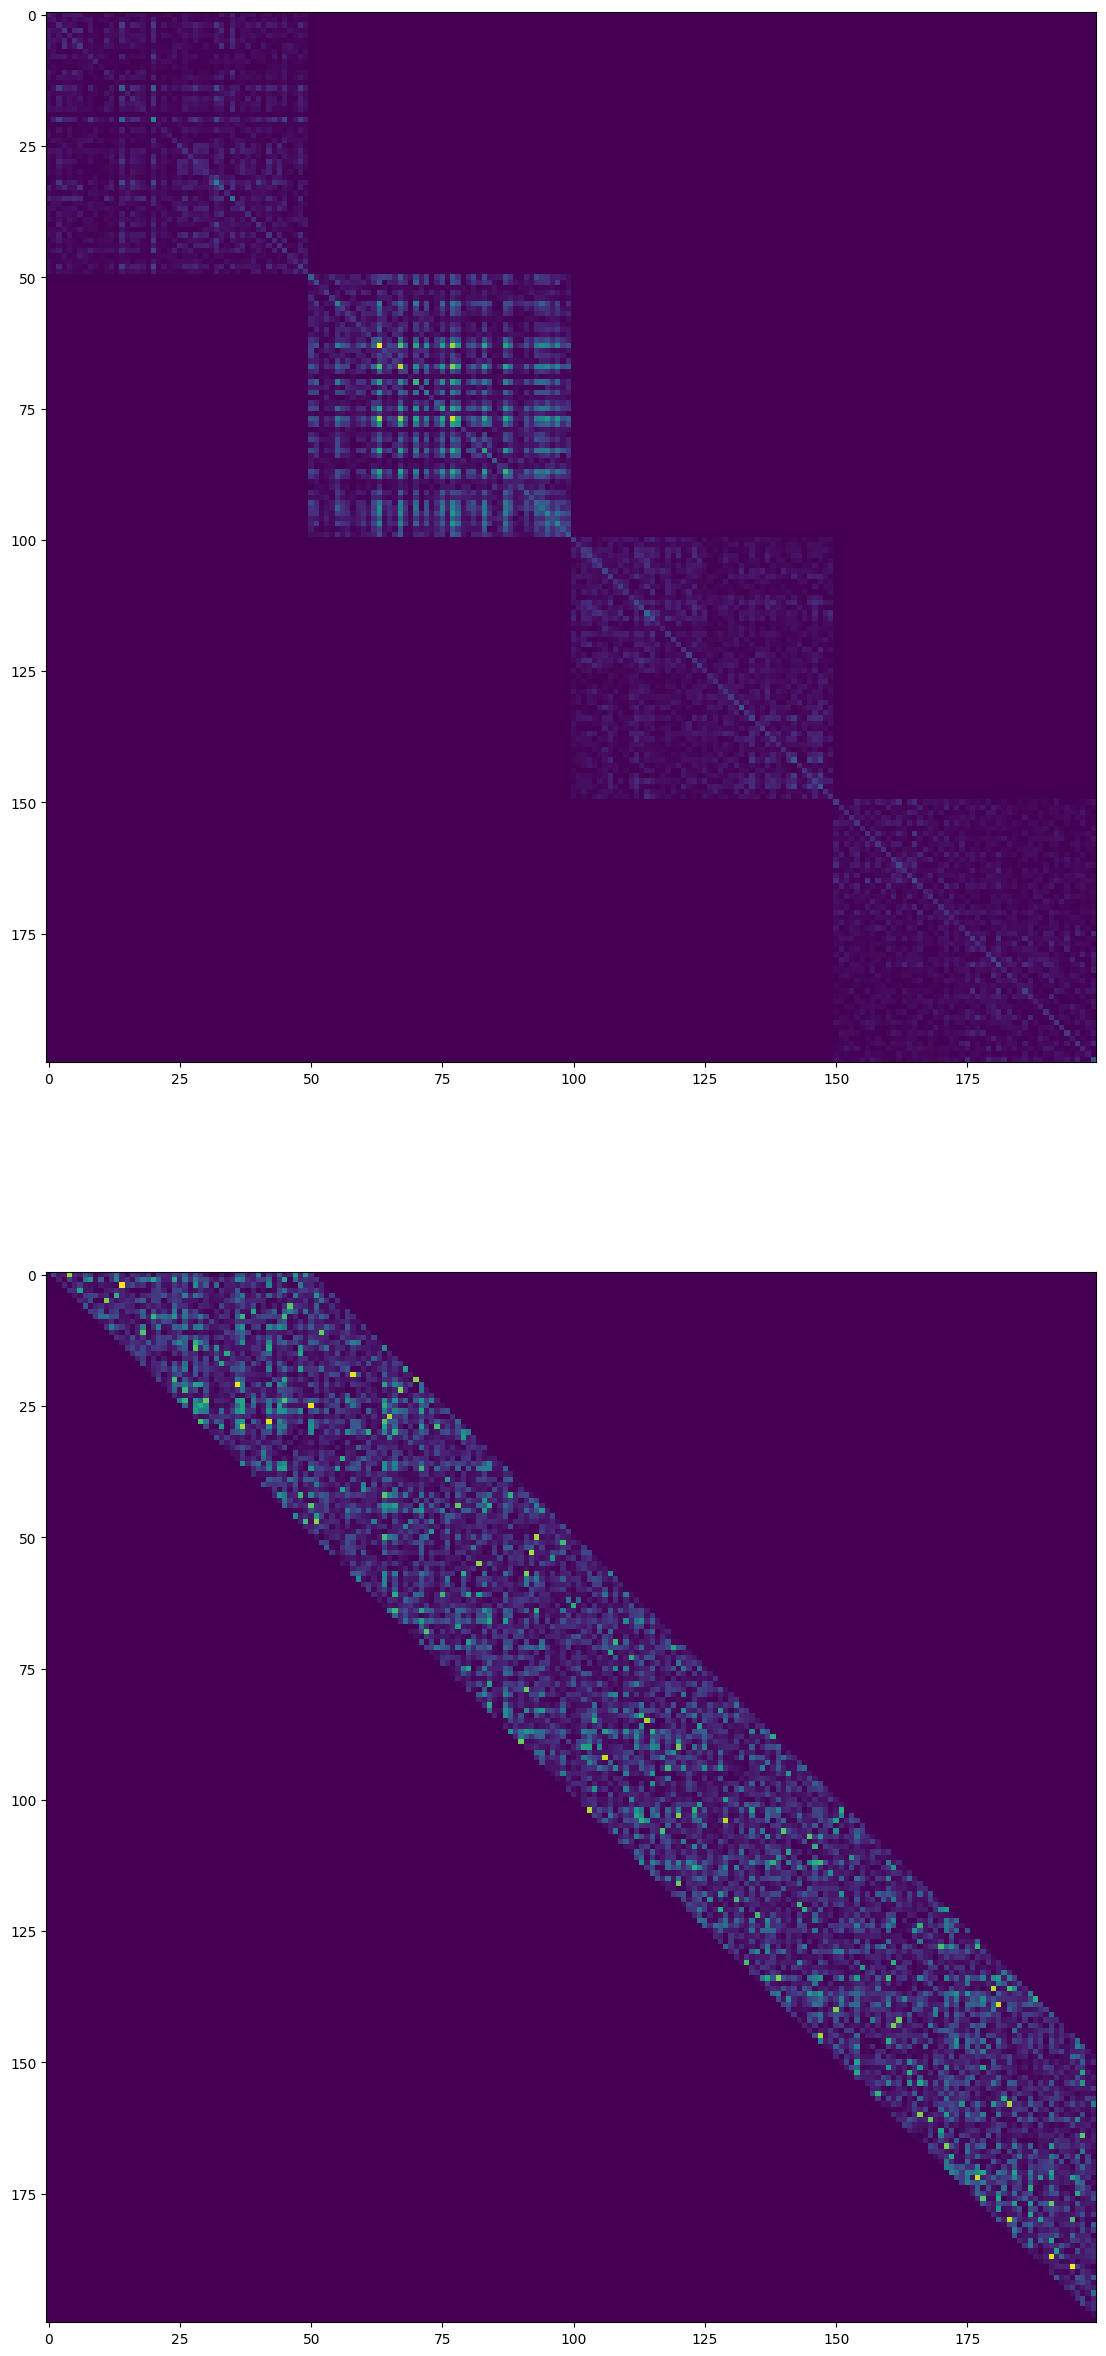

In [225]:
fig, ax = plt.subplots(2, figsize=(30,30))
ax[0].imshow(np.abs(final_score.toarray()[:200, :200]))
ax[1].imshow(np.abs(sample_X_cov.toarray()[:200, :200]))

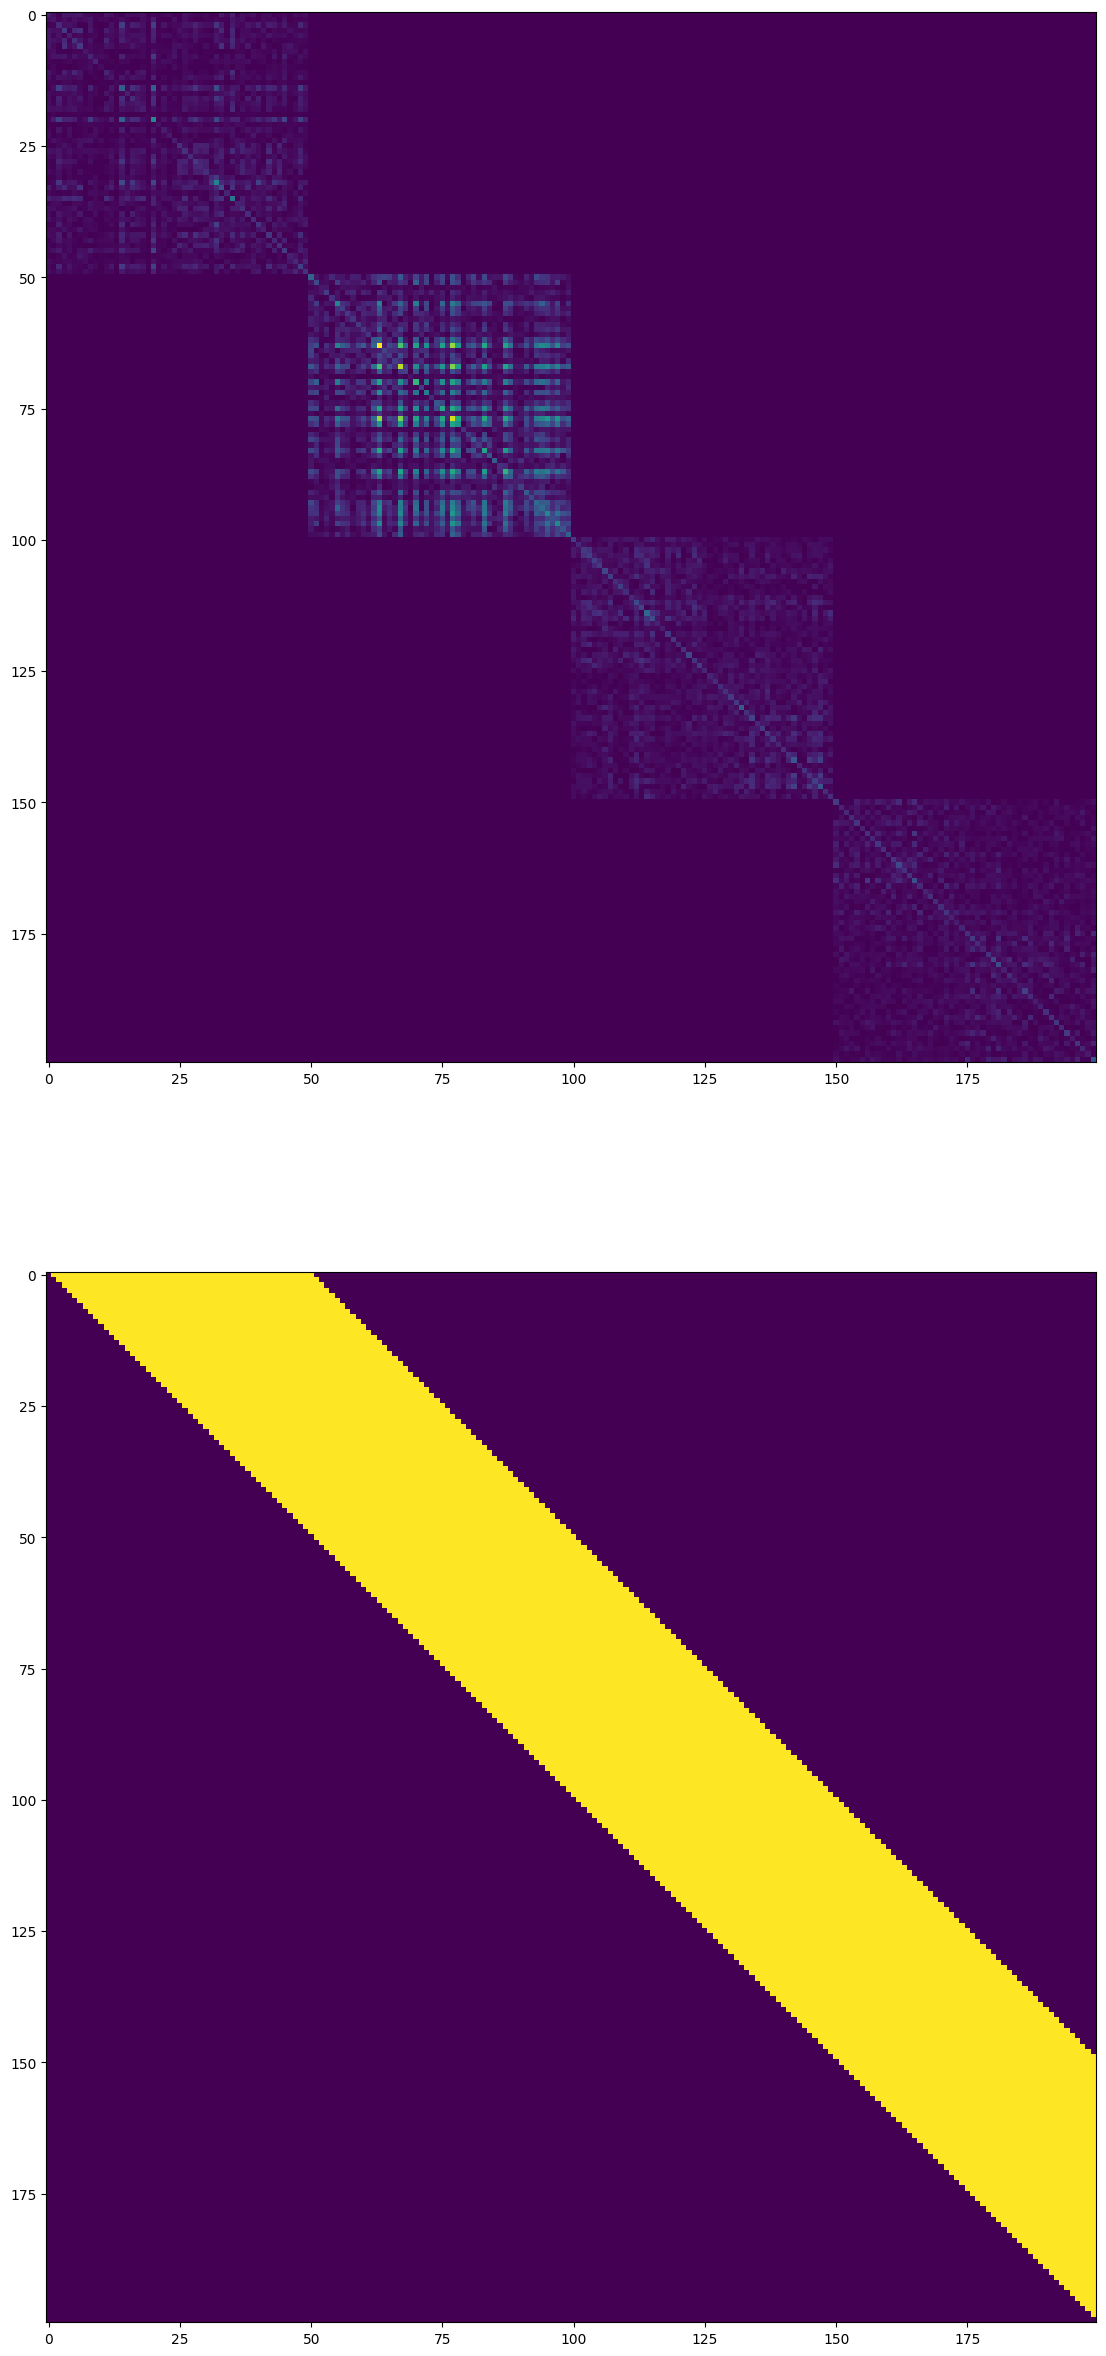

In [229]:
fig, ax = plt.subplots(2, figsize=(30,30))
ax[0].imshow(np.abs(final_score.toarray()[:200, :200]))
ax[1].imshow(np.abs(global_sparse(X_atac, potential_connections_X_atac).toarray()[:200, :200]))

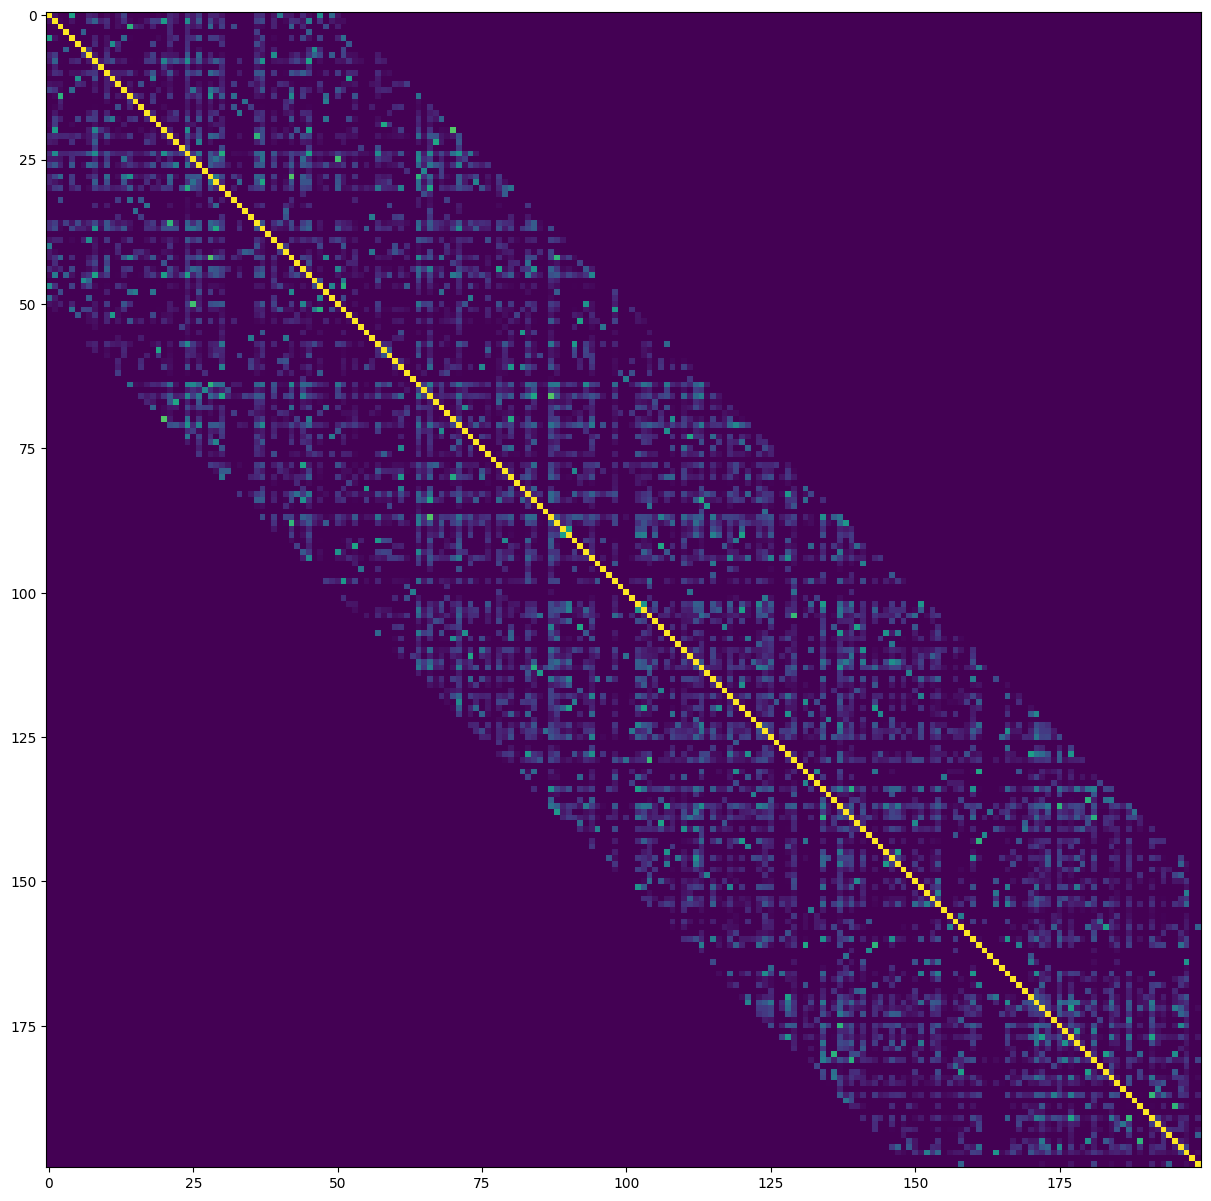

In [226]:
plt.subplots(1, figsize=(15,15))
def diag_block_mat_slicing(L):
    shp = L[0].shape
    N = len(L)
    r = range(N)
    out = np.zeros((N,shp[0],N,shp[1]),dtype=int)
    out[r,:,r,:] = L
    return out.reshape(np.asarray(shp)*N)
plt.imshow(cov)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
cicero = pd.read_csv('../../../HuMMuS/mofa_hummus/multilayers/ML_hESC_Chen_GeneNW_10K_Peaks2Genes_UP0.5K_DOWN0.5K_nofilt_nofilt_TFlayer_nolinks/multiplex/layer_PEAKS/peak_edges.tsv', sep='\t', header=None)

In [3]:
cicero.index = pd.MultiIndex.from_arrays([cicero[0], cicero[1]])

In [4]:
cicero = cicero[2].unstack()

In [5]:
cicero = cicero.fillna(0).to_numpy()

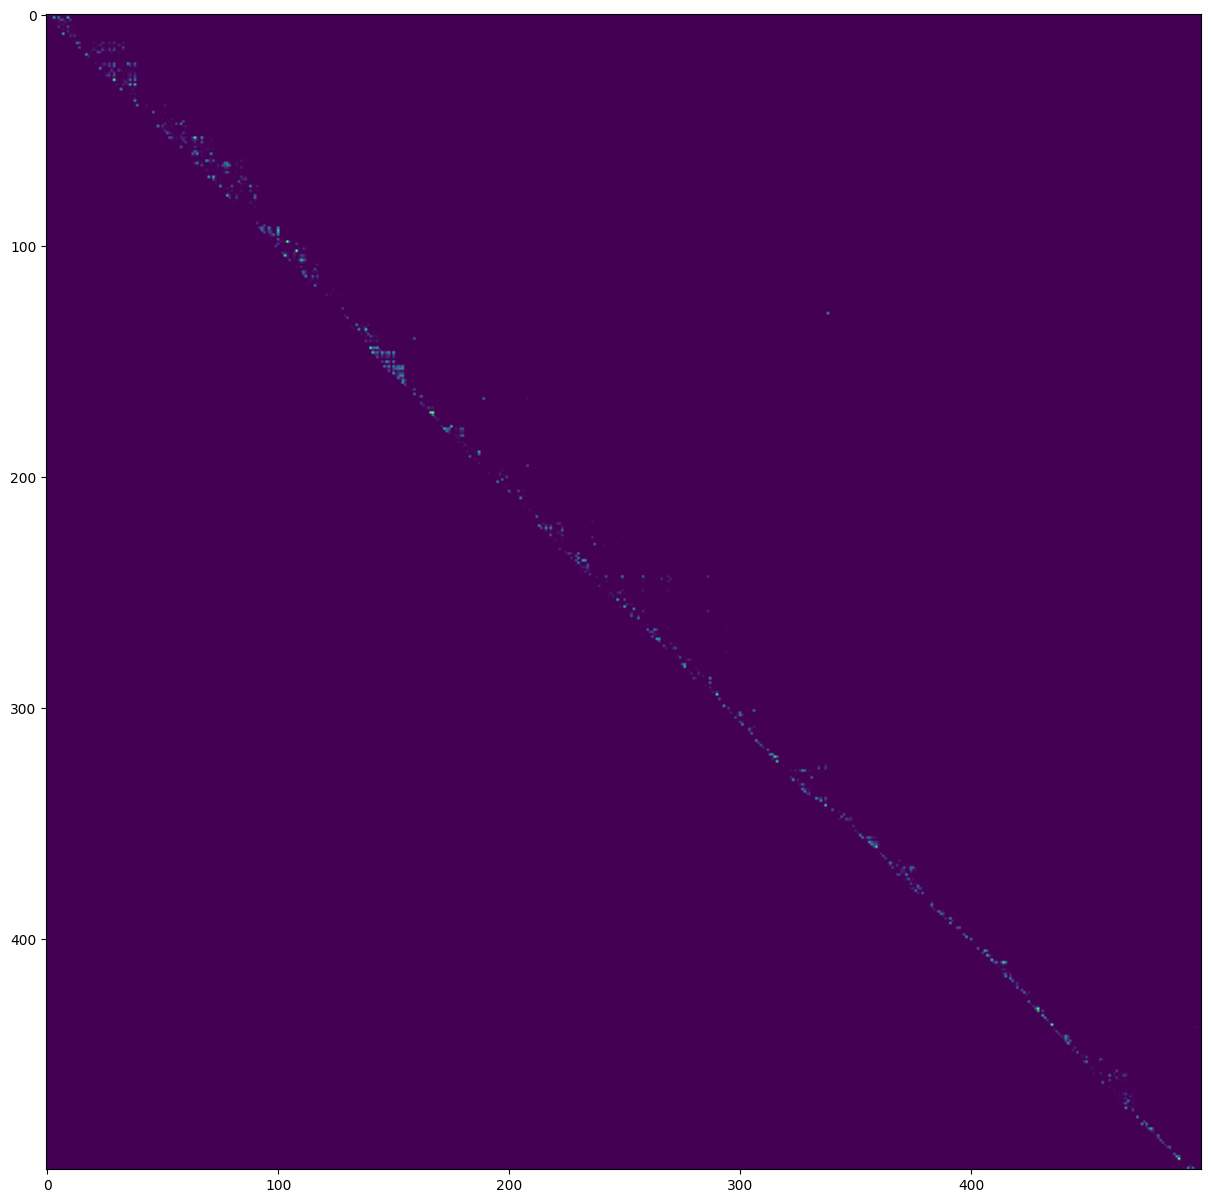

In [8]:
plt.subplots(1, figsize=(15,15))
plt.imshow(cicero[:500, :500])

In [148]:
sp.sparse.csr_matrix(sample_cov)[:50,:50].toarray()

array([[ 0.        , -0.00700442,  0.07900309, ..., -0.08658208,
        -0.02343908,  0.08069182],
       [ 0.        ,  0.        , -0.00190267, ..., -0.02205332,
        -0.04657126, -0.0043872 ],
       [ 0.        ,  0.        ,  0.        , ..., -0.00921396,
        -0.05257292,  0.00323809],
       ...,
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
        -0.14971947,  0.07366236],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.04317588],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ]])

In [222]:
k = 300
graph_lasso_model = quic_graph_lasso.QuicGraphicalLasso(init_method='precomputed', lam=np.random.random(size = (k,k)))

In [223]:
sample_cov = sample_cov.toarray() + sample_cov.T.toarray()
#sample_cov = sample_cov - (np.diag(sample_cov) - 1e-4) * np.eye(sample_cov.shape[0])
sample_cov += 1e-4 * np.eye(sample_cov.shape[0])
results = graph_lasso_model.fit(sample_cov[:k,:k], tol=1e-6)

In [224]:
(results.covariance_ - np.diag(results.covariance_)*np.eye(len(results.covariance_))).sum()

-648.7245551044573

In [162]:
results = graph_lasso_model.fit(atac.X[:200,:30].T, tol=1e-2)

In [163]:
(results.covariance_ - np.diag(results.covariance_)*np.eye(len(results.covariance_))).sum()

2.1513101824912457

In [164]:
graph_lasso_model = quic_graph_lasso.QuicGraphicalLasso(init_method='precomputed', lam=0.5)

In [177]:
sample_cov

<2000x2000 sparse matrix of type '<class 'numpy.float64'>'
	with 87250 stored elements in COOrdinate format>

In [ ]:
(results.covariance_ - np.diag(results.covariance_)*np.eye(len(results.covariance_))).sum()
#results.covariance_.shape

In [138]:
cov = np.corrcoef(atac.X[:200,:30])
cov = cov - (np.eye(len(cov))/np.diag(cov) - 1)

In [139]:
np.max(cov)

1.7231138584847492

In [13]:
from scipy.sparse import issparse

In [14]:
issparse(sample_cov)

True

In [21]:
np.max(np.abs(sample_cov.data))

249.13752508361202

In [297]:
sparse = sp.sparse.coo_matrix(sample_cov)

In [294]:
sparse = sp.sparse.csr_matrix(sparse)

In [296]:
sparse[:5,:5]

<5x5 sparse matrix of type '<class 'numpy.float64'>'
	with 25 stored elements in Compressed Sparse Row format>

In [298]:
blop = np.where(sparse.data>0)

In [299]:
blop2 = np.where(sparse.data>0)

In [310]:
pos_mask1 = np.where(sparse.data>0)
pos_idx1 = sparse.row[pos_mask1]
pos_idy1 = sparse.col[pos_mask1]

In [315]:
s1 = sparse
s2 = sparse

In [357]:
s1.data

array([ 1.00000000e-04,  2.86204013e+00, -7.87468896e+01, ...,
        2.99430881e+01,  2.67039576e+01,  1.00000000e-04])

In [368]:
pos_coord1 = {(x,y) for x,y,d in zip(s1.row, s1.col, s1.data) if d>=0}
pos_coord2 = {(x,y) for x,y,d in zip(s2.row, s2.col, s2.data) if d>=0}
pos_coord = pd.DataFrame(pos_coord1.intersection(pos_coord2), columns = ['row', 'col'])

neg_coord1 = {(x,y) for x,y,d in zip(s1.row, s1.col, s1.data) if d<=0}
neg_coord2 = {(x,y) for x,y,d in zip(s2.row, s2.col, s2.data) if d<=0}
neg_coord = pd.DataFrame(neg_coord1.intersection(neg_coord2), columns = ['row', 'col'])

In [370]:
pd.concat(neg_coord , pos_coord)

TypeError: concat() takes 1 positional argument but 2 were given

In [333]:
common = {}
common['row'] = np.array(bb)[:,0]
common['col'] = np.array(bb)[:,0]

array([1426, 1025, 1467, ..., 1625,  229,  934], dtype=int32)

In [352]:
sp.sparse.csr_matrix(s1)[(s1 + s2) > 0]

matrix([[1.00000000e-04, 2.86204013e+00, 6.95003344e+00, ...,
         2.99430881e+01, 2.67039576e+01, 1.00000000e-04]])

In [348]:
type(s1.multiply(s2))

scipy.sparse._csr.csr_matrix

In [317]:
import tqdm

[True if c1 in coord2 else False for c1 in tqdm.tqdm(coord1)]
[True if c2 in coord1 else False for c2 in tqdm.tqdm(coord2)]


KeyboardInterrupt: 

In [287]:
sparse.__dict__

{'_shape': (2000, 2000),
 'maxprint': 50,
 'data': array([ 1.00000000e-04,  2.86204013e+00, -7.87468896e+01, ...,
         2.99430881e+01,  2.67039576e+01,  1.00000000e-04]),
 'indices': array([   0,    1,    2, ..., 1997, 1998, 1999], dtype=int32),
 'indptr': array([     0,     51,    103, ..., 176397, 176449, 176500], dtype=int32)}

In [283]:
sparse[:4,:5]

TypeError: 'coo_matrix' object is not subscriptable

In [262]:
#%%timeit
np.where(np.abs(sp.sparse.csr_matrix(sample_cov)) - np.abs(sp.sparse.csr_matrix(sample_cov) - sp.sparse.csr_matrix(sample_cov)).todense())

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all().

In [260]:
np.array(d)

(array([   0,    0,    0, ..., 1999, 1999, 1999]),
 array([   0,    1,    2, ..., 1997, 1998, 1999]))